In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,mean_squared_error

import joblib

In [2]:
df = pd.read_csv('kopi.csv')
df.head(10)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Quality
0,8.67,8.83,8.67,8.75,8.50,8.42,90.58
1,8.75,8.67,8.50,8.58,8.42,8.42,89.92
2,8.42,8.50,8.42,8.42,8.33,8.42,89.75
3,8.17,8.58,8.42,8.42,8.50,8.25,89.00
4,8.25,8.50,8.25,8.50,8.42,8.33,88.83
5,8.58,8.42,8.42,8.50,8.25,8.33,88.83
6,8.42,8.50,8.33,8.50,8.25,8.25,88.75
7,8.25,8.33,8.50,8.42,8.33,8.50,88.67
8,8.67,8.67,8.58,8.42,8.33,8.42,88.42
9,8.08,8.58,8.50,8.50,7.67,8.42,88.25


In [3]:
df.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Quality
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,7.570652,7.524328,7.403208,7.539263,7.523331,7.524075,82.186477
std,0.315934,0.341830,0.350476,0.320282,0.293565,0.348599,2.678133
min,5.080000,6.080000,6.170000,5.250000,5.250000,6.080000,59.830000
25%,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,81.170000
50%,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,82.500000
75%,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,83.670000
max,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,90.580000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aroma       1303 non-null   float64
 1   Flavor      1303 non-null   float64
 2   Aftertaste  1303 non-null   float64
 3   Acidity     1303 non-null   float64
 4   Body        1303 non-null   float64
 5   Balance     1303 non-null   float64
 6   Quality     1303 non-null   float64
dtypes: float64(7)
memory usage: 71.4 KB


In [5]:
df.isnull().sum()

Aroma         0
Flavor        0
Aftertaste    0
Acidity       0
Body          0
Balance       0
Quality       0
dtype: int64

<AxesSubplot:>

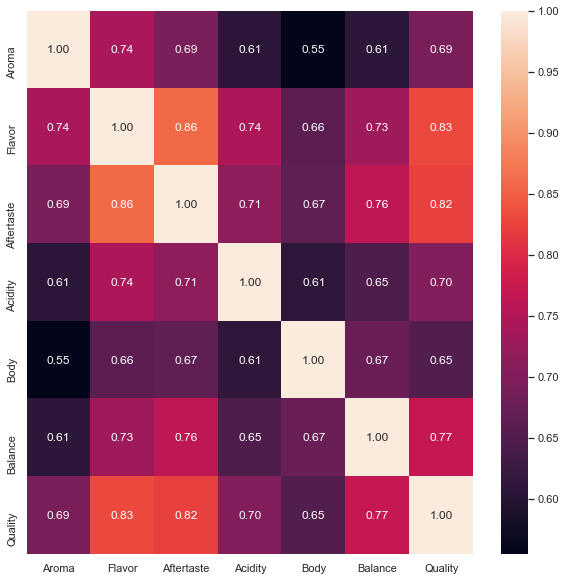

In [6]:
#Grafik korelasi antar variabel 
f,ax = plt.subplots(figsize=(10,10))

sns.set_theme(style="whitegrid")
sns.heatmap(df.corr(), annot=True,fmt='.2f',ax=ax)

##  Rentang pembagian kualitas kopi
- 80 - 85 = Good
- qualitas >= 80 = Fair
- qualitas <= 85 = High

In [7]:
df['Quality'] = df.Quality.apply(lambda q: 'Fair' if q <= 80 else 'Good' if q <= 85 else 'High')

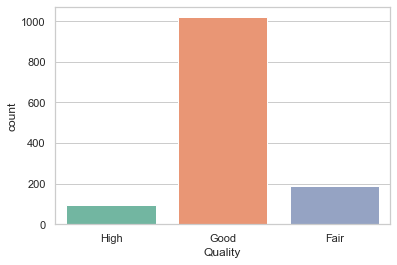

In [8]:
sns.countplot(x ='Quality', data = df,palette="Set2")
plt.show()

In [9]:
#Kualitas baru
df['Quality']

0       High
1       High
2       High
3       High
4       High
        ... 
1298    Fair
1299    Fair
1300    Fair
1301    Fair
1302    Fair
Name: Quality, Length: 1303, dtype: object

In [10]:
# Tabel kualitas baru
df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Quality
0,8.67,8.83,8.67,8.75,8.50,8.42,High
1,8.75,8.67,8.50,8.58,8.42,8.42,High
2,8.42,8.50,8.42,8.42,8.33,8.42,High
3,8.17,8.58,8.42,8.42,8.50,8.25,High
4,8.25,8.50,8.25,8.50,8.42,8.33,High
...,...,...,...,...,...,...,...
1298,7.00,6.33,6.17,6.50,6.67,6.17,Fair
1299,7.08,6.83,6.25,7.42,7.25,6.75,Fair
1300,6.75,6.58,6.42,6.67,7.08,6.67,Fair
1301,7.25,6.58,6.33,6.25,6.42,6.08,Fair


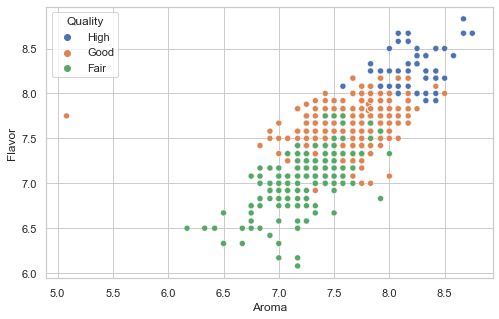

In [11]:
#Sebaran kualitas kopi berdasarkan rentang variabel aroma dan variabel flavor
plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, hue="Quality", x="Aroma", y="Flavor",marker="o")
plt.show()

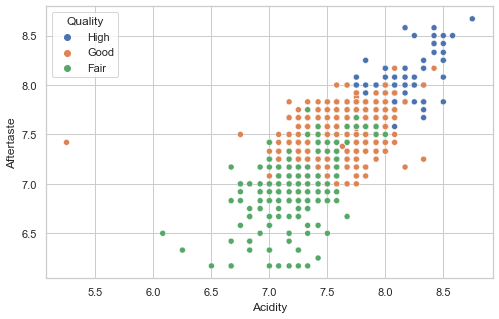

In [12]:
#Sebaran kualitas kopi berdasarkan variabel aftertaste dan variabel acidity
plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, hue="Quality", x="Acidity", y="Aftertaste",marker="o")
plt.show()

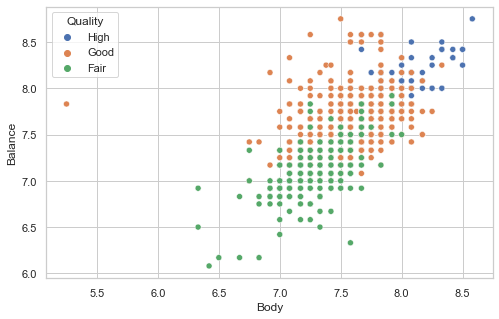

In [13]:
#Sebaran kualitas kopi berdasarkan variabel body dan variabel balance
plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df, hue="Quality", x="Body", y="Balance",marker="o")
plt.show()

### Membagi variabel independen (X) dan variabel dependen (Y)

In [14]:
y = df['Quality']
X = df.drop(['Quality'], axis=1)

#### Pemberian label kualitas
Memberikan label kualitas kopi menjadi 0,1,2 agar mudah dilakukan komputasi matematika
 - 0 = Fair
 - 1 = Good
 - 2 = High

In [15]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([2, 2, 2, ..., 0, 0, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Jumlah Y testing dan Y train
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

y_train Shape :  (1042,)
y_test Shape :  (261,)


In [19]:
#Buat model klasifikasi kualitas kopi dengan Gaussian Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [20]:
#hasil report acuracy,precision,recall berdasarkan nilai macro dari model gaussian naive bayes
model_kopi_NB = model_NB.predict(X_test)


acc = accuracy_score(y_test, model_kopi_NB)
precs = precision_score(y_test,model_kopi_NB,average='macro')
recal = recall_score(y_test,model_kopi_NB,average='macro')


print(classification_report(y_test, model_kopi_NB))
print("Accuracy = %.2f"  %acc)
print("Precision = %.2f" %precs)
print("Recall = %.2f " %recal)

              precision    recall  f1-score   support

           0       0.54      0.85      0.66        33
           1       0.97      0.86      0.91       209
           2       0.79      1.00      0.88        19

    accuracy                           0.87       261
   macro avg       0.77      0.90      0.82       261
weighted avg       0.90      0.87      0.88       261

Accuracy = 0.87
Precision = 0.77
Recall = 0.90 


#### Hasil kinerja model dengan confussion matrix 

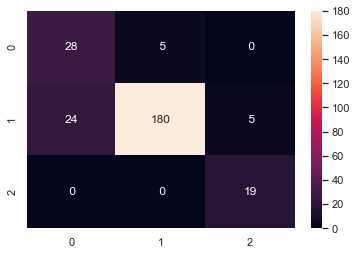

In [21]:
cm = confusion_matrix(y_test, model_kopi_NB)
sns.heatmap(cm,cmap="rocket",annot=True,fmt='2.0f')

plt.show()

In [22]:
#Nilai RMSE dari model 
rms = mean_squared_error(y_test,model_kopi_NB, squared=False)
print('RMSE = %.2f' %rms )

RMSE = 0.36


In [23]:
#Rata-rata akurasi 10x perulangan
accuracies = cross_val_score(estimator = model_NB, X = X_train, y = y_train, cv = 10)
print("Total Akurasi validasi 10 kali = ", accuracies)
print("Rata-rata akurasi = ", accuracies.mean())

Total Akurasi validasi 10 kali =  [0.91428571 0.88571429 0.89423077 0.875      0.89423077 0.875
 0.96153846 0.88461538 0.88461538 0.88461538]
Rata-rata akurasi =  0.8953846153846154


In [27]:
class_kopi = [3,2,1,2,3,1]
manipulate_arr = np.array(class_kopi).reshape(1,-1)
result = model_NB.predict(manipulate_arr)
result

array([2])

### Simpan model ML

In [67]:
filename = 'model_kopi_NB.pkl'
joblib.dump(model_NB, filename)

['model_kopi_NB.pkl']

<AxesSubplot:>

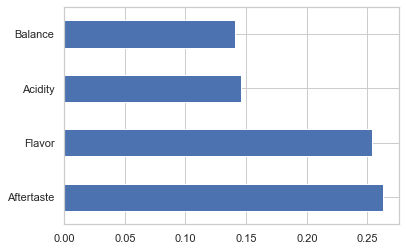

In [64]:
#Random forrest test
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh')) 